--- 
authors: Chinming Zhu
updated: december 3, 2025    
---
# Druksensor ijken en maken van een $pV$-diagram

## Introductie

In de experimentele natuurkunde was het lang geleden gelukt om de krachten tussen ladingen te bestuderen zonder dat bekend was hoe groot die ladingen nu precies waren. Men laadde een metalen bol op en hield deze tegen een andere metalen bol van hetzelfde materiaal. Men redeneerde dat de ladingen op de bollen gelijk waren, omdat ze van hetzelfde materiaal waren. Vervolgens plaatste men de bollen in een vacuüm en mat men de krachten tussen de bollen met een zeer gevoelige balans. Op deze manier kon men de krachten tussen de ladingen bestuderen zonder de absolute waarde van de ladingen te kennen. Dit trucje kon herhaald worden met andere bollen waarna een kwantiatieve beschrijving van de krachten tussen ladingen mogelijk werd.

Een soortgelijke meettechniek gaan we gebruiken om een druksensor te ijken. Van de sensor zijn wel wat dingen bekend, maar omdat de spanning van de Arduino niet overeenkomstig is met de gewenste spanning, zouden we deze moeten ijken. We weten dat de sensor lineair is, dus als we twee punten weten, kunnen we de rest van de curve bepalen. Nog beter zou het zijn om drie punten te nemen en zo ook het lineaire karakter van de sensor te bevestigen.

## Theorie

Een injectiespuit met een maximaal volume van 50 mL is gevuld met lucht. De spuit kan aan een kant afgesloten worden met een tube die verbonden is met een druksensor die de gasdruk meet. Door de zuiger van de spuit in te drukken, wordt het volume verkleind en de druk verhoogd. Wanneer we de druk langzaam in drukken verwachten we dat de druk in de spuit volgens de wet van Boyle toeneemt:

$$
    P_1 V_1 = P_2 V_2 
$$ (eq:Boyle)

Omdat de gemeten spanning van de druksensor lineair afhankelijk is van de druk, kan de druk uitgedrukt worden als:

$$
    P = a U + b
$$ (eq:lineair)



## Methode en materialen

```{note} Software
De Arduino code staat al op de Arduino's. Als je de Arduino aansluit op je computer en de Arduino IDE opent, kan je de seriële monitor openen om de gemeten spanning te zien.
```

Je maakt gebruik van een Arduino. Daarvoor heb je de juiste IDE nodig. Het programma staat al op de Arduino's in het lokaal. Zodra je de Arduino aansluit op je computer zal de Arduino gaan meten, maar zijn de metingen nog niet zichtbaar. Je moet de Arduino op `Arduino MKR Zero` zetten. Dan wordt nog wel een driver geinstalleerd. 

Controleer of de Arduino herkend wordt door op `tools` -> `port` te klikken, daar staat de com poort van de Arduino. Open vervolgens de seriële monitor (het vergrootglas rechtsboven in de IDE) om de gemeten spanning te zien.

```{warning}
De twee stekkertjes hoef je NIET met elkaar te verbinden. Dit is alleen voor een meting in de brandblusser.
``` 

```{code} C++
int drukpin = A1;

void setup() {
  pinMode(A1,INPUT);
  Serial.begin(9600);
}

void loop() {
  Serial.println(analogRead(drukpin));
  delay(100);
}
```

### Deel 1
Stel de injectiespuit in op 40 mL en sluit de spuit aan op de druksensor door middel van een zo klein mogelijke tube. Meet de spanning van de druksensor met de Arduino en noteer deze waarde als $U_1$. Druk vervolgens de zuiger langzaam in tot 20 mL en meet opnieuw de spanning van de druksensor, noteer deze waarde als $U_2$. Herhaal dit voor volumes van 10 mL. 

1. Leg uit waarom een zo klein mogelijke tube gebruikt moet worden.
2. Welke waarde hoort bij de gasdruk bij 40 mL? Zoek deze waarde op.
3. Welke waarden horen bij de gasdruk bij 20 en 10 mL? 
4. Gebruik de drie punten om de waarden van $a$ en $b$ in {numref}`vergelijking {number} <eq:lineair>` te bepalen en controleer of de sensor inderdaad lineair is door de waarden te plotten.

### Deel 2
Vervang daarbij de kleine tube voor een langere en bepaal het onbekende volume van de tube met een volgende meetserie waarbij je de druk en het volume bepaald. Zorg ervoor dat ook drukken onder de 1 atm gemeten worden. 
```{tip}
Maak gebruik van een systematische fout in het volume om het volume van de tube te vinden.
```

## Resultaten


### Deel 1 — vaste punten (40, 20, 10 mL)

1. **Waarom een zo klein mogelijke tube?**  
   De tube voegt extra (ongewenst) volume toe waarin ook lucht zit. Dat **dode volume** zorgt voor een systematische fout als je alleen het spuitvolume \(V\) gebruikt in Boyle (\(PV=\text{const}\)). Hoe kleiner de tube, hoe kleiner de fout en hoe dichter je bij de ideale Boyle-relatie blijft.

2. **Welke gasdruk hoort bij 40 mL?**  
   Bij \(V=40\,\text{mL}\) (als de spuit afgesloten is bij omgevingsdruk) geldt:  
   $$
   P(40)=P_{\text{atm}}\approx 1\,\text{atm} \approx 1013\,\text{mbar} \approx 1.013\,\text{bar} \approx 101325\,\text{Pa}.
   $$

3. **Welke gasdruk hoort bij 20 en 10 mL (ideaal, zonder tubevolume)?**  
   Met Boyle en referentiepunt \(P(40)=P_{\text{atm}}\):  
   $$
   P(20)=P_{\text{atm}}\frac{40}{20}=2P_{\text{atm}},\qquad
   P(10)=P_{\text{atm}}\frac{40}{10}=4P_{\text{atm}}.
   $$

4. **Bepaal \(a\) en \(b\) in \(P=aU+b\)** met de meetpunten bij 40, 20 en 10 mL, en **controleer lineariteit** met een plot.


### Gedetecteerde kolommen
- Volume: **0**
- Korte buis (mV): **korte buis**
- Lange buis (mV): **lange buis**

Datapunten: korte buis **16**, lange buis **16**.

### Deel 1 — lineaire fit $P=aU+b$ met 3 punten (zonder tubevolume)

,buis,a (mbar per mV),b (mbar),R²
0,korte buis (3 punten),8.938219,-618.135622,0.998701
1,lange buis (3 punten),11.573159,-1142.417093,0.993698


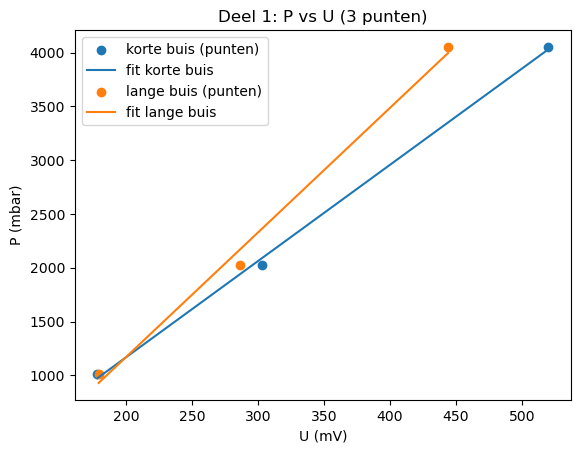

In werkelijkheid meet je druk van de lucht in **spuit + tube**. Daarom gebruiken we een effectief volume $V_{eff}=V+V_d$, waarbij $V_d$ het (onbekende) tubevolume is.

Met Boyle (referentie bij $V_{ref}=40\,\mathrm{mL}$):

$P(V)=P_{atm}\,\frac{V_{ref}+V_d}{V+V_d}$.

We bepalen $V_d$ zo dat $P(V)$ zo lineair mogelijk wordt als functie van de gemeten spanning $U$ in:

$P = aU + b$

en nemen aan dat **$a$ en $b$** hetzelfde zijn voor korte en lange buis (zelfde sensor).

,parameter,waarde
0,V_d korte buis (mL),2.300000
1,V_d lange buis (mL),5.600000
2,a (mbar per mV),7.301320
3,b (mbar),-287.419896
4,R² korte buis,0.999534
5,R² lange buis,0.999705


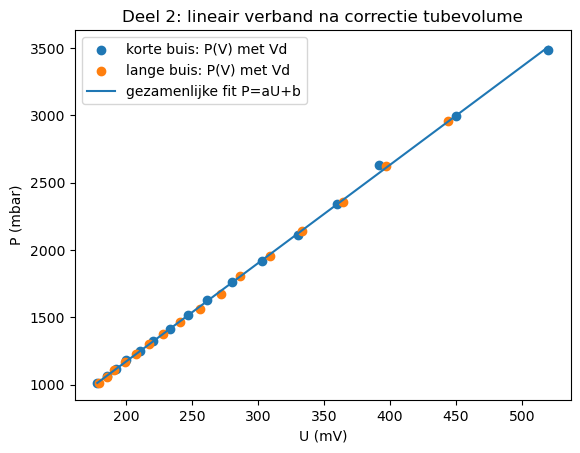

### pV-diagram

We gebruiken de kalibratie $P=aU+b$ en het effectieve volume $V_{eff}=V+V_d$.

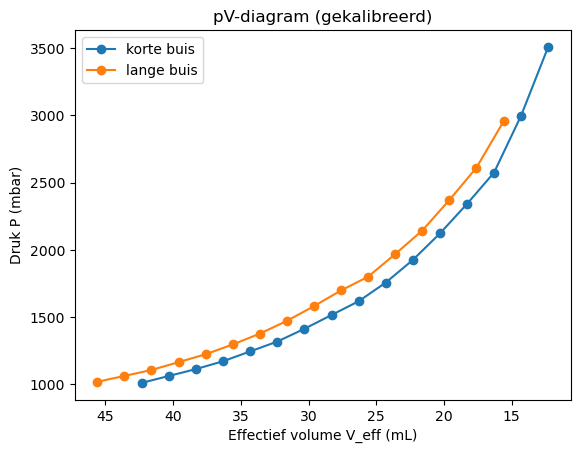

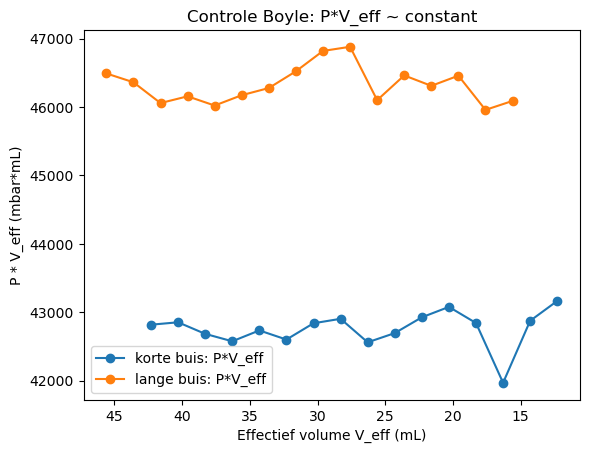

**Samenvatting:**

- $V_d$ korte buis ≈ **2.30 mL**
- $V_d$ lange buis ≈ **5.60 mL**
- Kalibratie: $P(\mathrm{mbar}) = 7.3013\,U(\mathrm{mV}) + -287.42$

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Instellingen 
EXCEL_FILE = "Book1-1 (1).xlsx"
SHEET = "Sheet4"
P_ATM_MBAR = 1013.25  # aangenomen 1 atm in mbar

# Data inlezen
df = pd.read_excel(EXCEL_FILE, sheet_name=SHEET, engine="openpyxl")

# Probeer automatisch de relevante kolommen te vinden (volume + korte/lange buis)
def find_volume_col(dataframe):
    best = None
    for col in dataframe.columns:
        s = pd.to_numeric(dataframe[col], errors="coerce").dropna()
        if len(s) < 8:
            continue
        vals = s.to_numpy()
        if np.nanmin(vals) >= 0 and np.nanmax(vals) <= 60:
            score = int(40 in np.round(vals).astype(int))
            if best is None or score > best[0]:
                best = (score, col)
    if best is None:
        raise ValueError("Geen volume-kolom gevonden.")
    return best[1]

vol_col = find_volume_col(df)

def find_pressure_col(name_hint):
    for col in df.columns:
        if isinstance(col, str) and name_hint.lower() in col.lower():
            return col
    return None

col_short = find_pressure_col("korte")
col_long  = find_pressure_col("lange")

if col_short is None or col_long is None:
    numeric_counts = []
    for col in df.columns:
        if col == vol_col:
            continue
        s = pd.to_numeric(df[col], errors="coerce")
        numeric_counts.append((s.notna().sum(), col))
    numeric_counts.sort(reverse=True)
    col_short = numeric_counts[0][1]
    col_long  = numeric_counts[1][1]

V_all = pd.to_numeric(df[vol_col], errors="coerce").to_numpy(dtype=float)
U_short_all = pd.to_numeric(df[col_short], errors="coerce").to_numpy(dtype=float)
U_long_all  = pd.to_numeric(df[col_long],  errors="coerce").to_numpy(dtype=float)

mask_s = np.isfinite(V_all) & np.isfinite(U_short_all)
mask_l = np.isfinite(V_all) & np.isfinite(U_long_all)

V_s, U_s = V_all[mask_s], U_short_all[mask_s]
V_l, U_l = V_all[mask_l], U_long_all[mask_l]

def sort_by_V(V, U):
    idx = np.argsort(V)
    return V[idx], U[idx]

V_s, U_s = sort_by_V(V_s, U_s)
V_l, U_l = sort_by_V(V_l, U_l)

display(Markdown(f"### Gedetecteerde kolommen\n- Volume: **{vol_col}**\n- Korte buis (mV): **{col_short}**\n- Lange buis (mV): **{col_long}**"))
display(Markdown(f"Datapunten: korte buis **{len(V_s)}**, lange buis **{len(V_l)}**."))

# Deel 1: a en b uit 3 punten (40, 20, 10 mL), zonder tubevolume 
def pick_U_at(V_target, V, U):
    V_round = np.round(V).astype(int)
    tgt = int(round(V_target))
    idx = np.where(V_round == tgt)[0]
    return float(U[idx[0]]) if len(idx) else None

def pressures_ideal_mbar(volumes, Vref=40.0, Patm=P_ATM_MBAR):
    volumes = np.asarray(volumes, float)
    return Patm * (Vref / volumes)

def fit_line(U, P):
    U = np.asarray(U, float)
    P = np.asarray(P, float)
    A = np.vstack([U, np.ones_like(U)]).T
    a, b = np.linalg.lstsq(A, P, rcond=None)[0]
    P_hat = a*U + b
    ss_res = np.sum((P - P_hat)**2)
    ss_tot = np.sum((P - np.mean(P))**2)
    r2 = 1 - ss_res/ss_tot if ss_tot > 0 else np.nan
    return a, b, r2

targets = [40, 20, 10]
U3_s = [pick_U_at(t, V_s, U_s) for t in targets]
U3_l = [pick_U_at(t, V_l, U_l) for t in targets]
P3 = pressures_ideal_mbar(targets)

a_s, b_s, r2_s = fit_line(U3_s, P3)
a_l, b_l, r2_l = fit_line(U3_l, P3)

res1 = pd.DataFrame({
    "buis": ["korte buis (3 punten)", "lange buis (3 punten)"],
    "a (mbar per mV)": [a_s, a_l],
    "b (mbar)": [b_s, b_l],
    "R²": [r2_s, r2_l],
})
display(Markdown("### Deel 1 — lineaire fit $P=aU+b$ met 3 punten (zonder tubevolume)"))
display(res1)

plt.figure()
plt.scatter(U3_s, P3, label="korte buis (punten)")
u_line = np.linspace(min(U3_s), max(U3_s), 200)
plt.plot(u_line, a_s*u_line + b_s, label="fit korte buis")
plt.scatter(U3_l, P3, label="lange buis (punten)")
u_line2 = np.linspace(min(U3_l), max(U3_l), 200)
plt.plot(u_line2, a_l*u_line2 + b_l, label="fit lange buis")
plt.xlabel("U (mV)")
plt.ylabel("P (mbar)")
plt.title("Deel 1: P vs U (3 punten)")
plt.legend()
plt.show()

# tubevolume
display(Markdown(
"In werkelijkheid meet je druk van de lucht in **spuit + tube**. "
"Daarom gebruiken we een effectief volume $V_{eff}=V+V_d$, waarbij $V_d$ het (onbekende) tubevolume is.\n\n"
"Met Boyle (referentie bij $V_{ref}=40\\,\\mathrm{mL}$):\n\n"
"$P(V)=P_{atm}\\,\\frac{V_{ref}+V_d}{V+V_d}$.\n\n"
"We bepalen $V_d$ zo dat $P(V)$ zo lineair mogelijk wordt als functie van de gemeten spanning $U$ in:\n\n"
"$P = aU + b$\n\n"
"en nemen aan dat **$a$ en $b$** hetzelfde zijn voor korte en lange buis (zelfde sensor)."
))

def P_boyle(V, Vd, Vref=40.0, Patm=P_ATM_MBAR):
    V = np.asarray(V, float)
    return Patm * (Vref + Vd) / (V + Vd)

def fit_a_b(U, P):
    A = np.vstack([U, np.ones_like(U)]).T
    a, b = np.linalg.lstsq(A, P, rcond=None)[0]
    P_hat = a*U + b
    ss_res = np.sum((P - P_hat)**2)
    ss_tot = np.sum((P - np.mean(P))**2)
    r2 = 1 - ss_res/ss_tot if ss_tot > 0 else np.nan
    return a, b, r2, ss_res

grid = np.arange(0.0, 25.0 + 0.05, 0.05)
best = None
U_all = np.concatenate([U_s, U_l])

for Vd_s in grid:
    P_s = P_boyle(V_s, Vd_s)
    for Vd_l in grid:
        P_l = P_boyle(V_l, Vd_l)
        P_all = np.concatenate([P_s, P_l])
        a, b, r2_all, sse = fit_a_b(U_all, P_all)
        if best is None or sse < best["sse"]:
            best = {"Vd_short": float(Vd_s), "Vd_long": float(Vd_l), "a": float(a), "b": float(b), "sse": float(sse), "r2_all": float(r2_all)}

Vd_short = best["Vd_short"]
Vd_long  = best["Vd_long"]
a = best["a"]
b = best["b"]

P_s = P_boyle(V_s, Vd_short)
P_l = P_boyle(V_l, Vd_long)
_, _, r2_short, _ = fit_a_b(U_s, P_s)
_, _, r2_long, _  = fit_a_b(U_l, P_l)

res2 = pd.DataFrame({
    "parameter": ["V_d korte buis (mL)", "V_d lange buis (mL)", "a (mbar per mV)", "b (mbar)", "R² korte buis", "R² lange buis"],
    "waarde": [Vd_short, Vd_long, a, b, r2_short, r2_long]
})
display(res2)

plt.figure()
plt.scatter(U_s, P_s, label="korte buis: P(V) met Vd")
plt.scatter(U_l, P_l, label="lange buis: P(V) met Vd")
u_line = np.linspace(np.min(U_all), np.max(U_all), 300)
plt.plot(u_line, a*u_line + b, label="gezamenlijke fit P=aU+b")
plt.xlabel("U (mV)")
plt.ylabel("P (mbar)")
plt.title("Deel 2: lineair verband na correctie tubevolume")
plt.legend()
plt.show()

#  pV-diagram 
display(Markdown("### pV-diagram\n\nWe gebruiken de kalibratie $P=aU+b$ en het effectieve volume $V_{eff}=V+V_d$."))
Pcal_s = a*U_s + b
Pcal_l = a*U_l + b
Veff_s = V_s + Vd_short
Veff_l = V_l + Vd_long

plt.figure()
plt.plot(Veff_s, Pcal_s, marker="o", linestyle="-", label="korte buis")
plt.plot(Veff_l, Pcal_l, marker="o", linestyle="-", label="lange buis")
plt.gca().invert_xaxis()
plt.xlabel("Effectief volume V_eff (mL)")
plt.ylabel("Druk P (mbar)")
plt.title("pV-diagram (gekalibreerd)")
plt.legend()
plt.show()

plt.figure()
plt.plot(Veff_s, Pcal_s*Veff_s, marker="o", linestyle="-", label="korte buis: P*V_eff")
plt.plot(Veff_l, Pcal_l*Veff_l, marker="o", linestyle="-", label="lange buis: P*V_eff")
plt.gca().invert_xaxis()
plt.xlabel("Effectief volume V_eff (mL)")
plt.ylabel("P * V_eff (mbar*mL)")
plt.title("Controle Boyle: P*V_eff ~ constant")
plt.legend()
plt.show()

display(Markdown(f"**Samenvatting:**\n\n- $V_d$ korte buis ≈ **{Vd_short:.2f} mL**\n- $V_d$ lange buis ≈ **{Vd_long:.2f} mL**\n- Kalibratie: $P(\\mathrm{{mbar}}) = {a:.4f}\\,U(\\mathrm{{mV}}) + {b:.2f}$"))



## Conclusie

- De druksensor laat een (bij benadering) lineair verband zien tussen sensorspanning $U$ en druk $P$.  
- Het gebruik van een langere tube introduceert extra “dood volume” $V_d$, waardoor de druk bij een gegeven spuitstand lager uitvalt dan wanneer je alleen $V$ van de spuit zou gebruiken.  
- Door $V_d$ mee te nemen in Boyle $V_\text{eff}=V+V_d$ wordt het verband $P=aU+b$ duidelijk lineair en kan het $pV$-diagram betrouwbaar gemaakt worden.
